# Lesson: more tools for statistical and climatological analysis

Last week we learned how to open a NetCDF file (a data format which is very common in atmospheric applications), select variables, do simple statistics on them, and plot them. Today we are going to introduce some more data-crunching tools and we are going to learn how to make our plots more precise and informative.

## Temperature data  

Let's open the ERA5 2m air temperature file (``ERA5_LowRes_Monthly_t2m.nc``). As usual, the files for today's class are available from the [download instructions](https://fabienmaussion.info/climate_system/download.html) page.

In [1]:
# Import the tools we are going to need today:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
# Some defaults:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

In [2]:
ds = xr.open_dataset('../data/ERA5_LowRes_Monthly_t2m.nc')
ds

<xarray.Dataset>
Dimensions:    (longitude: 480, latitude: 241, time: 480)
Coordinates:
  * longitude  (longitude) float32 -179.6 -178.9 -178.1 ... 178.1 178.9 179.6
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2018-12-01
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-11-18 09:36:58 GMT by grib_to_netcdf-2.14.0: /opt/ecmw...

**Q: do you know what ERA5 data is? Use your favorite search engine to get some basic information about it. What institution provides the data? Which time period is it available for? Where could you get the data if you need it for your upcoming thesis?**

**Try to discuss with your neighbor in a few sentences how you think that the ``t2m`` variable available in this NetCDF file was generated. Is it OK to call these data "observations"? Why not? Reanalysis data often plays the role of "observations" when they are used to evaluate the output of climate models. Can you tell why?**

In [3]:
# your answer here

When we "output" the dataset in a code cell, a so-called "HTML representation" of the dataset is printed in the cell output. It contains enough information to answer the following questions:
- **what are the dimensions of the t2m variable?**
- **what is the spatial resolution of this dataset? What is the spatial resolution according to the documentation?**
- **what is its temporal resolution?**
- **what it the data type of the various variables and coordinates available in the dataset? What are the differences between each data type?**

In [4]:
# your answer here

I have downloaded a coarse version of the ERA5 dataset because it is faster to analyze and to plot, and this resolution is sufficient for the analyses we do in this class. If you want to use higher-resolution data for your project, feel free! I'll show you how to download these data later in the lecture. 

## More control on plots

Let's compute the time average of the air temperature:

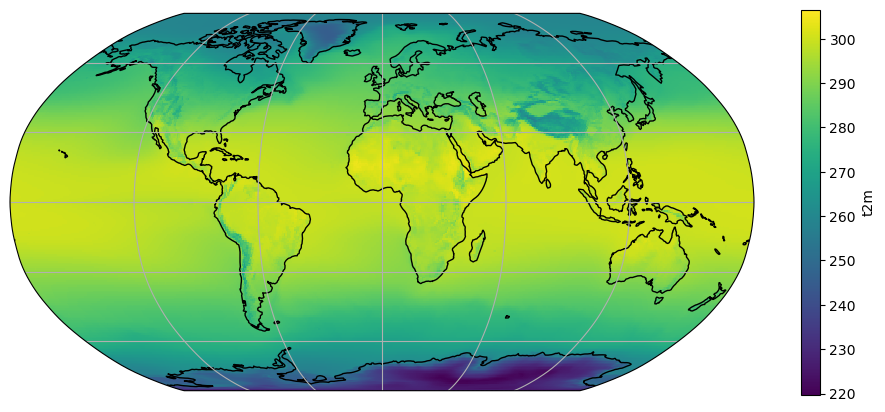

In [5]:
t2_tavg = ds.t2m.mean(dim='time')
ax = plt.axes(projection=ccrs.Robinson())
t2_tavg.plot(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines(); ax.gridlines();

### Discrete levels

Smooth (continuous) color tables like the above "look nice", but the human eye is not trained to see such small differences in color. For example, it would be quite difficult to tell the temperature of the Peruvian coast (above 280K? or below?). Sometimes, **discrete levels** are the way to go:  

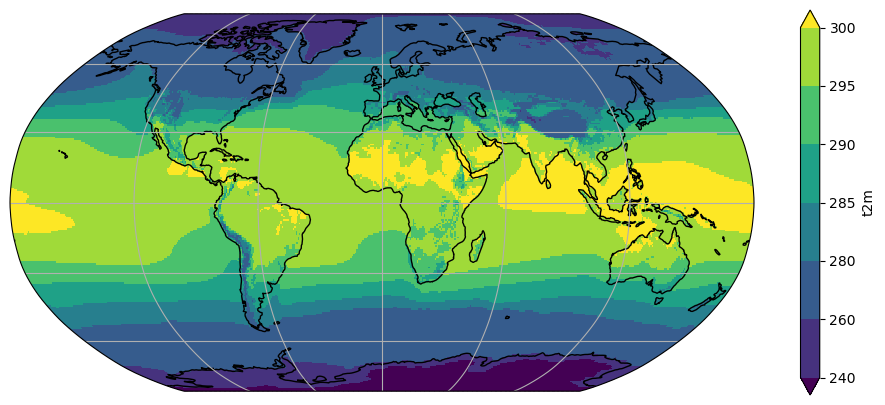

In [6]:
ax = plt.axes(projection=ccrs.Robinson())
t2_tavg.plot(ax=ax, transform=ccrs.PlateCarree(), levels=[240, 260, 280, 285, 290, 295, 300]) 
ax.coastlines(); ax.gridlines(); 

**Q: What is the use of the *unevenly spaced* levels we set?  In which range can we place the temperature off the Peruvian coast? If your eyes still can´t make out the difference, how can we be sure?**

**E: Make a new plot, but this time set ``levels=12``.**

In [7]:
# your answer here

### Color tables

Let's make a new variable called ``t2c_tavg``, which is ``t2_tavg`` converted to degrees celsius:

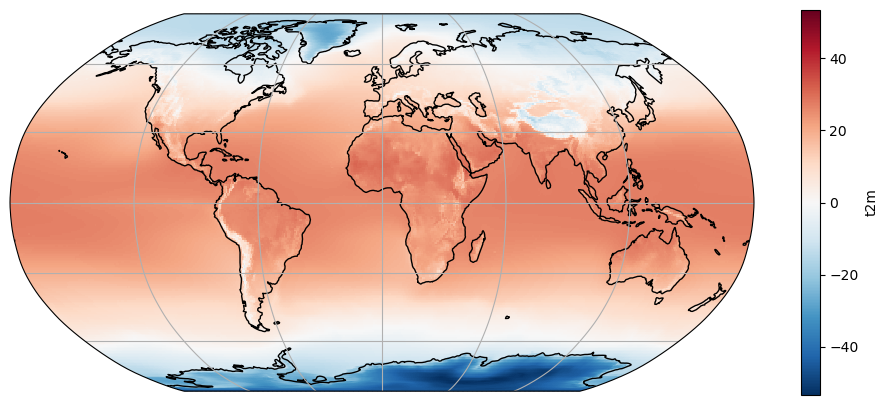

In [8]:
t2c_tavg = t2_tavg - 273.15
ax = plt.axes(projection=ccrs.Robinson())
t2c_tavg.plot(ax=ax, transform=ccrs.PlateCarree()) 
ax.coastlines(); ax.gridlines(); 

What happened to our plot? Note the location of the 0 on the colorbar and the automated choice of a new colorscale. Note also that the data range is mostly dictated by very cold temperatures in Antarctica. These automated choices are not always meaningful. Let's play around a little bit:

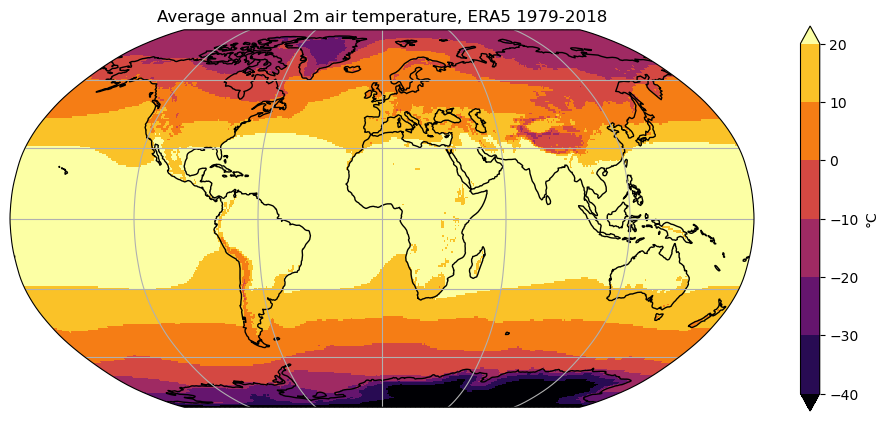

In [9]:
ax = plt.axes(projection=ccrs.Robinson())
t2c_tavg.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='inferno', center=False, 
              vmin=-40, vmax=20, levels=7, cbar_kwargs={'label': '°C'}) 
ax.set_title('Average annual 2m air temperature, ERA5 1979-2018')
ax.coastlines(); ax.gridlines(); 

**Q: try to understand the role of each keyword by trying to use each of them separately. If you're still unsure, a look at xarray's [documentation](http://xarray.pydata.org/en/stable/generated/xarray.plot.pcolormesh.html) might be helpful.**

Note: a list of matplotlib's color tables can be found [here](http://www.matplotlib.org/examples/color/colormaps_reference.html).

In [10]:
# your playground here

### Slightly faster map plots

xarray's `.plot` method internally uses matplotlib's [pcolormesh](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html) which, for reasons too long to explain here, is the more accurate way to represent gridded data on a map. If you are willing to sacrifice some accuracy (not visible with the bare eye at the global scale), you can also use [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html):

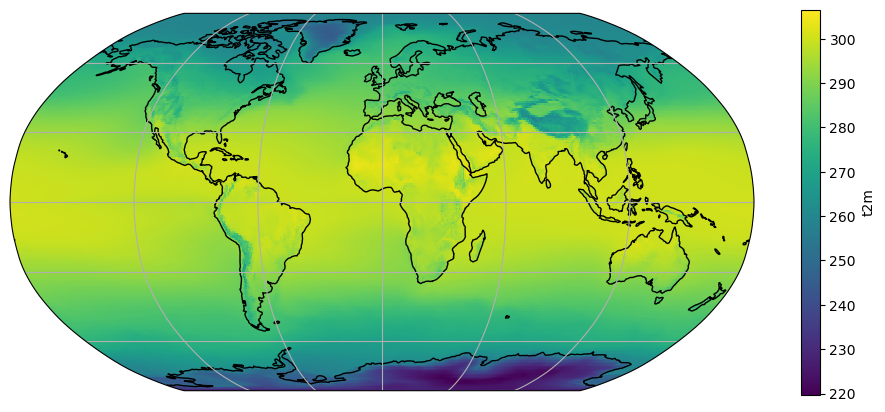

In [11]:
t2_tavg = ds.t2m.mean(dim='time')
ax = plt.axes(projection=ccrs.Robinson())
t2_tavg.plot.imshow(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines(); ax.gridlines();

This plot should render about 4 times faster than the default plot, which is useful for data exploration. It should not be used for final rendering or for regional plots, though.

## Working with time series

**E: print the dataset's time coordinate. Which period do the data cover?**

In [12]:
# your answer here

The selection tools we learned about last week also apply to time series. They are quite clever and very flexible:

In [13]:
t2 = ds.t2m
t2.sel(time='2008')

<xarray.DataArray 't2m' (time: 12, latitude: 241, longitude: 480)>
array([[[246.47635, 246.47635, ..., 246.47635, 246.47635],
        [248.12787, 248.12257, ..., 248.12434, 248.1261 ],
        ...,
        [242.43304, 242.45067, ..., 242.3978 , 242.41718],
        [242.79437, 242.79437, ..., 242.79437, 242.79437]],

       [[249.47446, 249.47446, ..., 249.47446, 249.47446],
        [250.00674, 249.99265, ..., 250.02086, 250.01556],
        ...,
        [233.04744, 233.06506, ..., 233.00513, 233.02805],
        [233.77538, 233.77538, ..., 233.77538, 233.77538]],

       ...,

       [[255.86372, 255.86372, ..., 255.86372, 255.86372],
        [256.39426, 256.3872 , ..., 256.40485, 256.4013 ],
        ...,
        [235.71594, 235.72652, ..., 235.68422, 235.70007],
        [236.4386 , 236.4386 , ..., 236.4386 , 236.4386 ]],

       [[251.50316, 251.50316, ..., 251.50316, 251.50316],
        [252.31746, 252.31393, ..., 252.32628, 252.32275],
        ...,
        [245.15266, 245.16324, ..., 245.12624, 245.14034],
        [246.60678, 246.60678, ..., 246.60678, 246.60678]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -179.6 -178.9 -178.1 ... 178.1 178.9 179.6
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 2008-01-01 2008-02-01 ... 2008-12-01
Attributes:
    units:      K
    long_name:  2 metre temperature

**Q: what did we just do? Does that make sense to you? Try to understand the output of the following commands:**
- t2.sel(time='2008-02')
- t2.sel(time='2008/02')
- t2.sel(time=slice('2008', '2012'))

In [14]:
# Your answer here

### Time series of globally averaged fields 

If you remember last week, you should understand well what the following command will do:

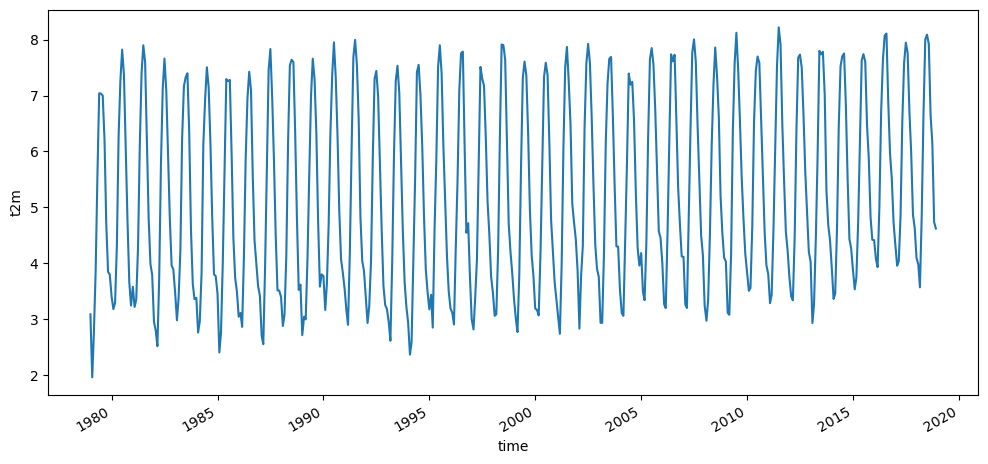

In [15]:
ts_t2_c = t2.mean(dim=['longitude', 'latitude']) - 273.15  # convert into Celsius
ts_t2_c.plot();

Logically, the global average temperature on Earth would be: 

In [16]:
ts_t2_c.mean(dim='time')

<xarray.DataArray 't2m' ()>
array(5.2003684, dtype=float32)

But... wait? This is way colder than expected! (**Q: do you remember what is the average air temperature at the Earth surface?**). Indeed, we forgot to take the latitudinal effect into account. If you forgot about how to do that already, [go back to last week's lesson](https://fabienmaussion.info/climate_system/week_02/01_Lesson_NetCDF_Data.html#arithmetics-and-averages-on-a-sphere).

In [17]:
# Meridional weights
weight = np.cos(np.deg2rad(ds.latitude))
weight = weight / weight.sum()

# Meridionally weighted zonal mean
zonal_mean_t2_c = t2.mean(dim='longitude') - 273.15  # convert into Celsius
weighted_zonal_mean_t2_c = zonal_mean_t2_c * weight
weighted_ts_t2_c = weighted_zonal_mean_t2_c.sum(dim='latitude')

Now, in comparison to last week, the second line (`zonal_mean_t2_c * weight`) did even a little bit more of magic. Although `zonal_mean_t2_c` is of dimensions (`time`, `latitude`), we could multiply it by an array of dimension `latitude`. This is called "broadcasting" in the numpy jargon, and something you don't have to worry about in this lecture: xarray does it for you! Indeed, xarray knows about the dimensions of your data (and their coordinates) and will always make arithmetic operations match these.

**E: make a plot of this time series and compute its average. Does the global average now fit better to what we said in the lecture?**

In [18]:
# your answer here

Note that the operations above were only valid because averaging is a linear operation, i.e. commutative. For any field $A$, the equality $\left[ \overline{A} \right] = \overline{\left[A \right]}$ is always true.

### Resample time series data

Resampling is the operation of changing the *sampling* of the data, i.e. the frequency at which it is sampled. One of the most meaningful ways to resample is to do an average, for example over the year:

In [19]:
tsa_t2_c = weighted_ts_t2_c.resample(time='AS').mean()

**E: check that ``tsa_t2_c`` is what you think it is. What could the ``'AS'`` mean? Try ``'A'`` for a change, and note the difference.**

Note that averaging is [not the only way](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.resample.html) available to resample data. **Try ``.std()`` and  ``.max()``, too.**

In [20]:
# your answer here

**E: describe the features of the yearly average plot. Does it surprise you, or is it the way you thought it would be? Compute the standard deviation of this time series (tip: .std())** 

In [21]:
# your answer here

### Compute the monthly climatographies (or annual cycle)

Another way to look at time series data is to average them according to the time of year to study the annual cycle. This is done with the ``.groupby()`` method:

In [22]:
tsm_t2_c = weighted_ts_t2_c.groupby('time.month').mean()

**E: check that ``tsm_t2_c`` is what you think it is. What is the new dimension of the data? Plot it. Can you explain what you see?**

In [23]:
# your answer here

### Averages and anomalies 

A very common way to decompose time-series is to normalize them. Let $A$ be any field, function of time $t$. Then:

$$A(t) = \overline{A} + A'(t)$$

Where $A'$ is called the fluctuating component of $A$, $A'(t)$ being the anomaly of $A$ at the time $t$. Often the variable t is omitted from the notation, i.e. one writes $A = \overline{A} + A'$

**E: compute the temperature anomaly for the year 1997 with respect to the 1979-2018 average.**

In [24]:
# your answer here

**E: by noting that the functions applied to 1d data above also apply to 3d data, compute the temperature anomaly for the month of January 2010 with respect to the 1979-2018 January average.**

In [25]:
# your answer here

## Selecting specific areas of our data

As for the time above, one can select slices out of the data:

In [26]:
t2_reg = t2_tavg.sel(longitude=slice(-40, 40))

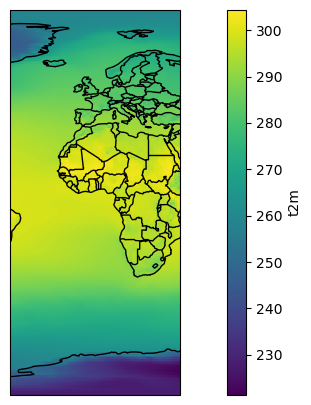

In [27]:
ax = plt.axes(projection=ccrs.PlateCarree()) # Note that I changed the projection
t2_reg.plot(ax=ax, transform=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.BORDERS); # What does this command do? 
ax.coastlines();

**E: create a new "t2c_reg" variable which is a subset of t2c_tavg between the longitudes (-20, 60) and the latitudes (40, -40). Plot the result.** (*hint: yes, I wrote (40, -40) and not (-40, 40)*)

In [28]:
# your answer here

### Selection based on a condition

What if we are interested into air temperature on land only, and want to remove the oceans from our analyses? For this we are going to have to "mask out" the oceans grid points. First, we will need to open the "invariant: file: 

In [29]:
nc_inv = xr.open_dataset('../data/ERA5_LowRes_Invariant.nc')
nc_inv

<xarray.Dataset>
Dimensions:    (longitude: 480, latitude: 241, time: 1)
Coordinates:
  * longitude  (longitude) float32 -179.6 -178.9 -178.1 ... 178.1 178.9 179.6
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 1979-01-01
Data variables:
    lsm        (time, latitude, longitude) float32 ...
    wmb        (time, latitude, longitude) float32 ...
    z          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-11-18 09:24:36 GMT by grib_to_netcdf-2.14.0: /opt/ecmw...

**E: explore this new data file (variables, units). Plot the variables.**

In [30]:
# your answer here

OK, so in the `lsm` variable "1" is land, "0" is ocean. We are going to use this information to mask out the values from the ocean:

In [31]:
masked_t2_avg = t2c_tavg.where(nc_inv.lsm > 0.5)

**E: Plot this new variable on a map. Then compute its zonal average and plot it!**

In [32]:
# your answer here

## Dimensional juggling! 

I am now going to apply a series of commands to our data. Let's see if you can follow each step:

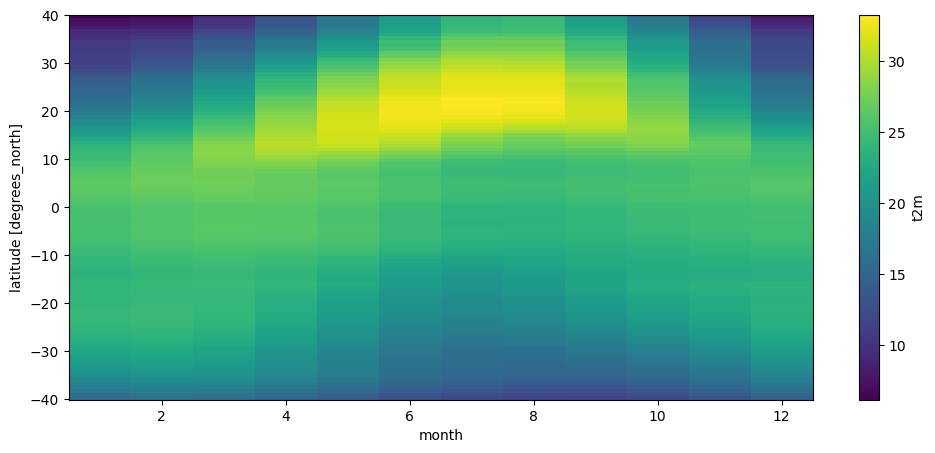

In [33]:
t2_m_reg = ds.t2m.sel(longitude=slice(-20, 60), latitude=slice(40, -40)).groupby('time.month').mean(dim='time') - 273.15
t2_m_reg_z = t2_m_reg.mean(dim='longitude')
t2_m_reg_z.T.plot();

Can you follow what I did? If not, decompose each step and see if you can follow the operations one by one.

The plot above is called a [Hovmöller diagram](https://en.wikipedia.org/wiki/Hovm%C3%B6ller_diagram), used very often in climatology. **Q: Can you describe its features?**

## Contour plots

Reconsider the Africa plot and the Hovmöller plot above. Both are quite "pixellized" (the first one because at regional scale, the coarse spatial resolution of these data becomes visible). Xarray's method of choice to display 2d data is to represent it as if it was an "image". It's ok most of the time, but sometimes you'd like to plot more contoured data. For example: 

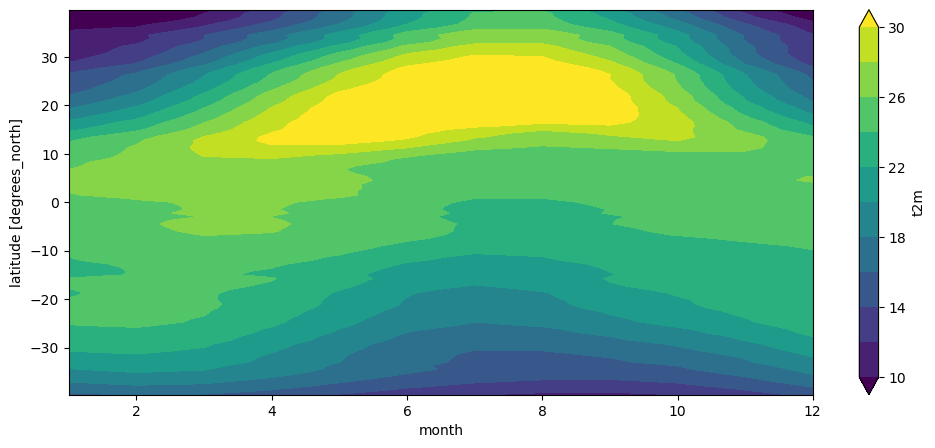

In [34]:
t2_m_reg_z.T.plot.contourf(levels=np.linspace(10, 30, 11));

## Multi-line plots 

Maps and contours are nice, but often the most powerful and quantitative way to plot data is to use line plots. We already showed that 1D data is plotted by xarray as a line automatically. Can we plot multiple lines from a 2D data array? 

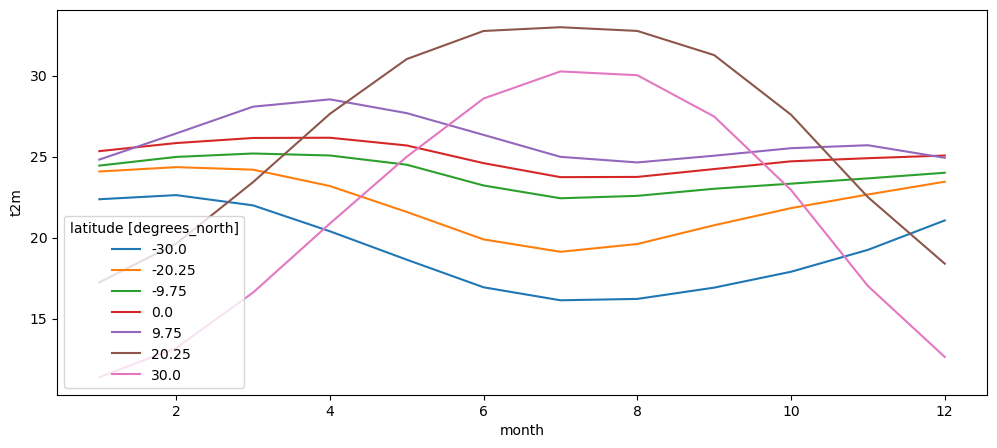

In [35]:
# The following line selects data along given latitudes (here in 10° steps)
# 'nearest' tells xarray to select the closest available coordinate when the 
# exact one is not available
t2_m_reg_sel = t2_m_reg_z.sel(latitude=np.linspace(-30, 30, 7), method='nearest')

# Let's plot the lines!
t2_m_reg_sel.plot(hue='latitude');

## What's next? 

You are now ready for this week's assignment! If you want to know more about xarray's plotting capabilities, visit the excellent [documentation](http://xarray.pydata.org/en/stable/plotting.html).